# Versuch 222 Heißluftmotor - Auswertung
##### Felix Fleischle - 15.11.2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Betrieb als Kältemaschine
Wir wollen die Kälteleistung des Motors berechnen, und die Energiebilanz aufstellen.

In [2]:
# Unsere Messdaten:
f_km = 294.4 / 60 #Drehzahl in 1/s
f_km_err = 1 / 60

U_H_km = 5.37
U_H_km_err = 0.01

I_H_km = 1.04 * 5
I_H_km_err = 0.01 * 5

V_punkt_km = 264 / (60 * 10**(6)) # l/s
V_punkt_km_err = 3 / (60 * 10**(6))

U_M_km = 23.9
U_M_km_err = 0.1

I_M_km = 1.7
I_M_km_err = 0.1

T_1_km = 20.1 + 273.15
T_1_km_err = 0.1

T_2_km = 17.1 + 273.15
T_2_km_err = 0.1

T_3_km = 20 + 273.15
T_3_km_err = 0.1

c_W = 4180 # J/kgK
rho_W = 997 # kg/m^3

In [3]:
# Wir berechnen Q_1
Q_1_km = (c_W * rho_W * V_punkt_km * (T_1_km - T_2_km))/(f_km)

def errorFrac(x, x_err, p):
    return (x_err * p)/x

V_punkt_km_errfrac = errorFrac(V_punkt_km , V_punkt_km_err, 1)
Delta_T_km_errfrac = errorFrac((T_1_km - T_2_km), np.sqrt(T_1_km_err**2 + T_2_km_err**2), 1)
f_km_errfrac = errorFrac(f_km, f_km_err, 1)

Q_1_km_err = np.sqrt(V_punkt_km_errfrac**2 + Delta_T_km_errfrac**2 + f_km_errfrac**2) * Q_1_km

print("Q_1:", Q_1_km, "+-", Q_1_km_err, "[J]")

Q_1: 11.211373369565218 +- 0.5449802686412554 [J]


In [4]:
# Wir berechnen Q_2 und die Kälteleistung
Q_2_km = (U_H_km * I_H_km)/f_km
P_H_km = (U_H_km * I_H_km)

U_H_km_errfrac = errorFrac(U_H_km , U_H_km_err , 1)
I_H_km_errfrac = errorFrac(I_H_km , I_H_km_err , 1)

Q_2_km_err = np.sqrt(U_H_km_errfrac**2 + I_H_km_errfrac**2 + f_km_errfrac**2) * Q_2_km
P_H_km_err = np.sqrt(U_H_km_errfrac**2 + I_H_km_errfrac**2) * P_H_km

print("Q_2:", Q_2_km, "+-", Q_2_km_err, "[J]")
print("Kälteleistung:", P_H_km, "+-", P_H_km_err, "[J/s]")

Q_2: 5.691032608695653 +- 0.058995242698796156 [J]
Kälteleistung: 27.924000000000003 +- 0.27348903085864346 [J/s]


In [5]:
# Wir berechnen W_M
W_M_km = (U_M_km * I_M_km)/f_km

U_M_km_errfrac = errorFrac(U_M_km , U_M_km_err , 1)
I_M_km_errfrac = errorFrac(I_M_km , I_M_km_err , 1)

W_M_km_err = np.sqrt(U_M_km_errfrac**2 + I_M_km_errfrac**2 + f_km_errfrac**2) * W_M_km

print("W_M:", W_M_km, "+-", W_M_km_err, "[J]")

W_M: 8.280570652173912 +- 0.4891324144444677 [J]


In [6]:
# Es sollte sein: Q_1 = Q_2 + W_M. Wir prüfen:
E_km_diff = Q_2_km + W_M_km - Q_1_km
E_km_diff_err = np.sqrt(Q_2_km_err**2 + W_M_km_err**2 + Q_1_km_err**2)

print("Differenz der Energiebilanz:", E_km_diff, "+-", E_km_diff_err, "[J]" )

# Abweichung:
sigma_E_km_diff = E_km_diff / E_km_diff_err

print("Sigma-Abweichung:", sigma_E_km_diff)

Differenz der Energiebilanz: 2.7602298913043466 +- 0.7346662172236174 [J]
Sigma-Abweichung: 3.7571210252943876


In [7]:
# Wir berechnen noch den Wirkungsgrad
eta_km = Q_2_km / W_M_km
eta_km_err = np.sqrt((Q_2_km_err / W_M_km)**2 + (Q_2_km * W_M_km_err / (W_M_km)**2)**2)

print("Wirkungsgrad:", eta_km, "+-", eta_km_err)

Wirkungsgrad: 0.6872754122569531 +- 0.04121769700974085


## Betrieb als Kältemaschine und Wärmepumpe
Berechnung der Kälteleistung: $P_{km} = \frac{\lambda_{H2O}m_W}{t_{gef}} $

In [8]:
# Wir bestimmen aus dem Temperaturverlauf die Gefrierzeit zu
t_gef = 200 #s
t_gef_err = 10

lmbda_h2o = 335 * 1000 #J/kg
V_W = 1*10**(-6) #m^3

m_W = rho_W * V_W

P_km = lmbda_h2o * m_W / t_gef
P_km_err = np.sqrt((lmbda_h2o * m_W * t_gef_err / (t_gef)**2)**2)

print("Kälteleistung:", P_km, "+-", P_km_err, "[J/s]")

Kälteleistung: 1.669975 +- 0.08349875 [J/s]


## Betrieb als Wärmekraftmaschine


In [9]:
# Unsere Messwerte
U_H_wk = 12.27 #V
U_H_wk_err = 0.01

I_H_wk = 2.68 * 5 #A
I_H_wk_err = 0.01 * 5

f_wk_array = np.array([253 , 241.7 , 238]) / 60 # 1/s
f_wk = np.mean(f_wk_array)
f_wk_err = np.std(f_wk_array) / np.sqrt(3)

print("Gemittelte Drehzahl:", f_wk, "+-", f_wk_err, "[1/s]")

delta_T_wk = 6 #K
delta_T_wk_err = 0.5 #K

W_pV_wk_array = np.array([25350*10**(-4) , 27200*10**(-4) , 26190*10**(-4)]) #Pa m^3
W_pV_wk = np.mean(W_pV_wk_array)
W_pV_wk_err = np.std(W_pV_wk_array) / np.sqrt(3)

print("Gemittelte Arbeit pV:", W_pV_wk, "+-", W_pV_wk_err, "[Pa/m^3]")

V_punkt_wk = 279 / (60 * 10**(6))
V_punkt_wk_err = 4 / (60 * 10**(6))

Gemittelte Drehzahl: 4.070555555555556 +- 0.06139496366792646 [1/s]
Gemittelte Arbeit pV: 2.6246666666666667 +- 0.043666242576396945 [Pa/m^3]


In [10]:
# Wir berechnen: P_el, Q_el, P_ab, Q_ab, P_pV, eta_th

P_el = U_H_wk * I_H_wk
P_el_err = np.sqrt((U_H_wk * I_H_wk_err)**2 + (U_H_wk_err * I_H_wk)**2)
print("P_el:", P_el, "+-", P_el_err, "[J/s]")

Q_el = P_el / f_wk
Q_el_err = np.sqrt((P_el_err / f_wk)**2 + (P_el * f_wk_err / (f_wk)**2)**2)
print("Q_el:", Q_el, "+-", Q_el_err, "[J]")

P_ab = c_W * rho_W * delta_T_wk * V_punkt_wk
P_ab_err = np.sqrt((c_W * rho_W * delta_T_wk_err * V_punkt_wk)**2 + (c_W * rho_W * delta_T_wk * V_punkt_wk_err)**2)
print("P_ab:", P_ab, "+-", P_ab_err, "[J/s]")

Q_ab = P_ab / f_wk
Q_ab_err = np.sqrt((P_ab_err / f_wk)**2 + (P_ab * f_wk_err / (f_wk)**2)**2)
print("Q_ab:", Q_ab, "+-", Q_ab_err, "[J]")

P_pV = W_pV_wk * f_wk
P_pV_err = np.sqrt((W_pV_wk_err * f_wk)**2 + (W_pV_wk * f_wk_err)**2)
print("P_pV:", P_pV, "+-", P_pV_err, "[J/s]")

eta_th = W_pV_wk / Q_el
eta_th_err = np.sqrt((W_pV_wk_err / Q_el)**2 + (W_pV_wk * Q_el_err / (Q_el)**2)**2)
print("eta_th:", eta_th, "+-", eta_th_err)

P_el: 164.418 +- 0.6279635737843399 [J/s]
Q_el: 40.392029480005455 +- 0.6284498062049172 [J]
P_ab: 116.27213400000001 +- 9.831695301215161 [J/s]
Q_ab: 28.56419287566535 +- 2.4534429359826446 [J]
P_pV: 10.683851481481483 +- 0.23991689451597278 [J/s]
eta_th: 0.06497981657410674 +- 0.001480143299182087


In [11]:
# Energiebilanz Q_el = Q_v + W_pV + Q_ab + Q_R, Q_V = Q_v + Q_R
Q_V = Q_el - W_pV_wk - Q_ab
Q_V_err = np.sqrt(Q_el_err**2 + W_pV_wk_err**2 + Q_ab_err**2)
print("Energieverluste:", Q_V, "+-", Q_V_err, "[J]")

Energieverluste: 9.203169937673437 +- 2.5330294391859876 [J]


In [12]:
# Drehmomentmessung und Bestimmung von W_D, W_pV_dreh, eta_th_dreh und eta_eff

# Berechnung der Mittelwerte
#0.8N
f_08_array = np.array([185.5 , 160.1 , 168]) / 60 #1/s
f_08 = np.mean(f_08_array)
f_08_err = np.std(f_08_array)/np.sqrt(3)

W_pV_08_array = np.array([3.435 , 3.334 , 3.337]) # Pa m^3
W_pV_08 = np.mean(W_pV_08_array)
W_pV_08_err = np.std(W_pV_08_array)/np.sqrt(3)

#0.6N
f_06_array = np.array([197.1 , 194.1 , 201.4]) / 60 #1/s
f_06 = np.mean(f_06_array)
f_06_err = np.std(f_06_array)/np.sqrt(3)

W_pV_06_array = np.array([3.135 , 3.134 , 3.14]) # Pa m^3
W_pV_06 = np.mean(W_pV_06_array)
W_pV_06_err = np.std(W_pV_06_array)/np.sqrt(3)

#0.4N
f_04_array = np.array([262.8 , 255.3 , 256.8]) / 60 #1/s
f_04 = np.mean(f_04_array)
f_04_err = np.std(f_04_array)/np.sqrt(3)

W_pV_04_array = np.array([3.328 , 3.232 , 3.3]) # Pa m^3
W_pV_04 = np.mean(W_pV_04_array)
W_pV_04_err = np.std(W_pV_04_array)/np.sqrt(3)

#0.2N
f_02_array = np.array([306.3 , 303.2 , 301.8]) / 60 #1/s
f_02 = np.mean(f_02_array)
f_02_err = np.std(f_02_array)/np.sqrt(3)

W_pV_02_array = np.array([3.161 , 3.143 , 3.112]) # Pa m^3
W_pV_02 = np.mean(W_pV_02_array)
W_pV_02_err = np.std(W_pV_02_array)/np.sqrt(3)

In [13]:
# Wir berechnen W_D = 2*pi*l*F
l = 0.2 * 0.5 #m
F = np.array([0.8 , 0.6 , 0.4 , 0.2])#N
F_err = np.ones(4)*0.01

W_D_array = 2*np.pi*l*F
W_D_array_err = 2*np.pi*l*F_err
print("Mechanische Arbeiten: ",W_D_array, "+-", W_D_array_err, "[J]")

# Wir berechnen eta_th_dreh = W_pV_dreh / Q_el
W_pV_dreh = np.array([W_pV_08, W_pV_06 , W_pV_04 , W_pV_02])
W_pV_dreh_err = np.array([W_pV_08_err, W_pV_06_err , W_pV_04_err , W_pV_02_err])

print("W_pV Mittelwerte:",W_pV_dreh,"+-",W_pV_dreh_err,"[Pam^3]")

eta_th_dreh = W_pV_dreh / Q_el
eta_th_dreh_err = np.sqrt((W_pV_dreh_err / Q_el)**2 + (W_pV_dreh * Q_el_err / (Q_el)**2)**2)

print("eta_th Drehmomentmessung:", eta_th_dreh, "+-", eta_th_dreh_err)

# Wir berechnen eta_eff = W_D / Q_el

eta_eff = W_D_array / Q_el
eta_eff_err = np.sqrt((W_D_array_err / Q_el)**2 + (W_D_array * Q_el_err / (Q_el)**2)**2)
print("eta_eff:", eta_eff, "+-", eta_eff_err)

Mechanische Arbeiten:  [0.50265482 0.37699112 0.25132741 0.12566371] +- [0.00628319 0.00628319 0.00628319 0.00628319] [J]
W_pV Mittelwerte: [3.36866667 3.13633333 3.28666667 3.13866667] +- [0.0270897  0.00151535 0.02327294 0.01168411] [Pam^3]
eta_th Drehmomentmessung: [0.08339929 0.07764733 0.08136919 0.0777051 ] +- [0.00146066 0.00120868 0.00139095 0.00124312]
eta_eff: [0.01244441 0.0093333  0.0062222  0.0031111 ] +- [0.00024837 0.0002128  0.00018322 0.00016291]


Text(0, 0.5, '$\\eta_{th}$')

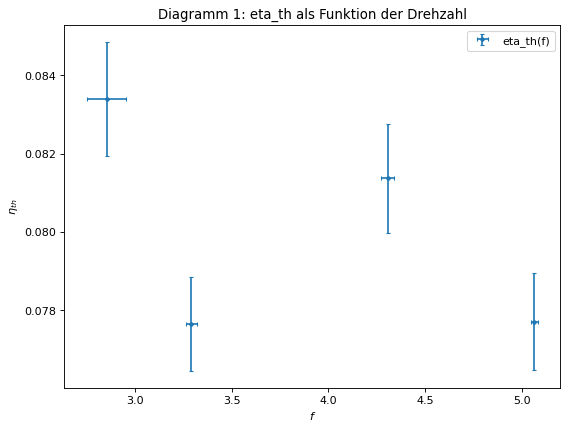

In [14]:
# Wir tragen eta_th und eta_eff als Funktion der Frequenz auf:
f_array = np.array([f_08 , f_06 , f_04 , f_02])
f_array_err = np.array([f_08_err , f_06_err , f_04_err , f_02_err])

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(f_array, eta_th_dreh, linestyle="None", marker = ".", yerr = eta_th_dreh_err, xerr = f_array_err , capsize = 2, label="eta_th(f)")
plt.title("Diagramm 1: eta_th als Funktion der Drehzahl")
plt.legend()
plt.xlabel("$f$")
plt.ylabel("$\eta_{th}$")

Text(0, 0.5, '$\\eta_{eff}$')

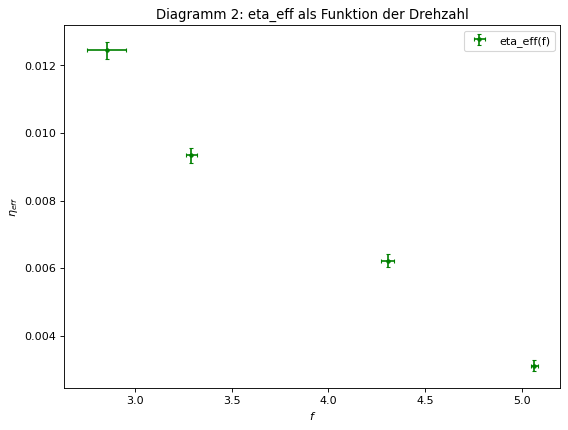

In [15]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(f_array, eta_eff, linestyle="None", marker = ".", yerr = eta_eff_err, xerr = f_array_err , capsize = 2, label="eta_eff(f)", color = "green")
plt.title("Diagramm 2: eta_eff als Funktion der Drehzahl")
plt.legend()
plt.xlabel("$f$")
plt.ylabel("$\eta_{eff}$")